In [25]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
vehicles = glob.glob('images/vehicles/*/*.png')

In [3]:
non_vehicles = glob.glob('images/non-vehicles/*/*.png')

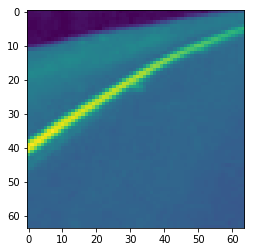

In [4]:
image = cv2.imread(non_vehicles[10])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [5]:
np.ravel(image)

array([38, 39, 40, ..., 83, 85, 84], dtype=uint8)

In [6]:
features = hog(image, orientations=10, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=False, 
                       visualise=False, feature_vector=False)

In [7]:
features.shape

(7, 7, 2, 2, 10)

In [8]:
len(vehicles)

8792

In [9]:
len(non_vehicles)

8968

In [46]:
X_vehicle = []


In [47]:
X_non_vehicle = []

In [48]:
for vehicle_image in vehicles:
    veh_img = cv2.imread(vehicle_image)
    gray = cv2.cvtColor(veh_img, cv2.COLOR_RGB2GRAY)
    features = hog(gray, orientations=10, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=False, 
                       visualise=False, feature_vector=False)
    X_vehicle.append(np.ravel(features))

In [49]:
for non_veh_image in non_vehicles:
    non_veh_img = cv2.imread(non_veh_image)
    gray = cv2.cvtColor(non_veh_img, cv2.COLOR_RGB2GRAY)
    features = hog(gray, orientations=10, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), transform_sqrt=False, 
                       visualise=False, feature_vector=False)
    X_non_vehicle.append(np.ravel(features))

In [50]:
vehicles_y = np.ones(len(vehicles))

In [51]:
non_vehicles_y = np.zeros(len(non_vehicles))

In [52]:
X = X_vehicle + X_non_vehicle

In [53]:
X = np.array(X)

In [54]:
y = np.append(vehicles_y, non_vehicles_y)

In [55]:
len(X_vehicle)

8792

In [56]:
len(vehicles)

8792

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
clf = svm.SVC(verbose=True)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [59]:
pred = clf.predict(X_test)

In [60]:
accuracy_score(y_test, pred)

0.8831644144144144

In [27]:
X_test.shape

(3552, 1960)

In [29]:
np.sum(y_test)

1751.0

In [30]:
X_test[15]

array([ 0.03027464,  0.00260001,  0.01309442, ...,  0.00670038,
        0.00908683,  0.0014909 ])

In [31]:
clf.predict(X_test[15])

/Users/croepke/anaconda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])